In [1]:
from BPTK_Py import bptk
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd
import math

In [2]:
bptk = bptk()

# Define the model

A model of a pond fed by a season stream, subject to overflow and evaporation

In [3]:
model = Model(starttime=1.0,stoptime=730.0,dt=1.0,name='Watershed')

In [4]:
overflow = model.constant('overflow')
overflow.equation = 10.0
pond = model.stock('pond')
pond.initial_value = 0.0

In [10]:
inflow = model.flow('inflow')
inflow.equation = 1.0 + sd.cos(2 * math.pi * (sd.time() - 182.5) / 365.0)
outflow = model.flow('outflow')
outflow.equation = sd.If((pond > overflow), pond - overflow, 0.0)
evaporation = model.flow('evaporation')
evaporation.equation = 0.1 * pond

In [11]:
pond.equation = inflow - outflow - evaporation

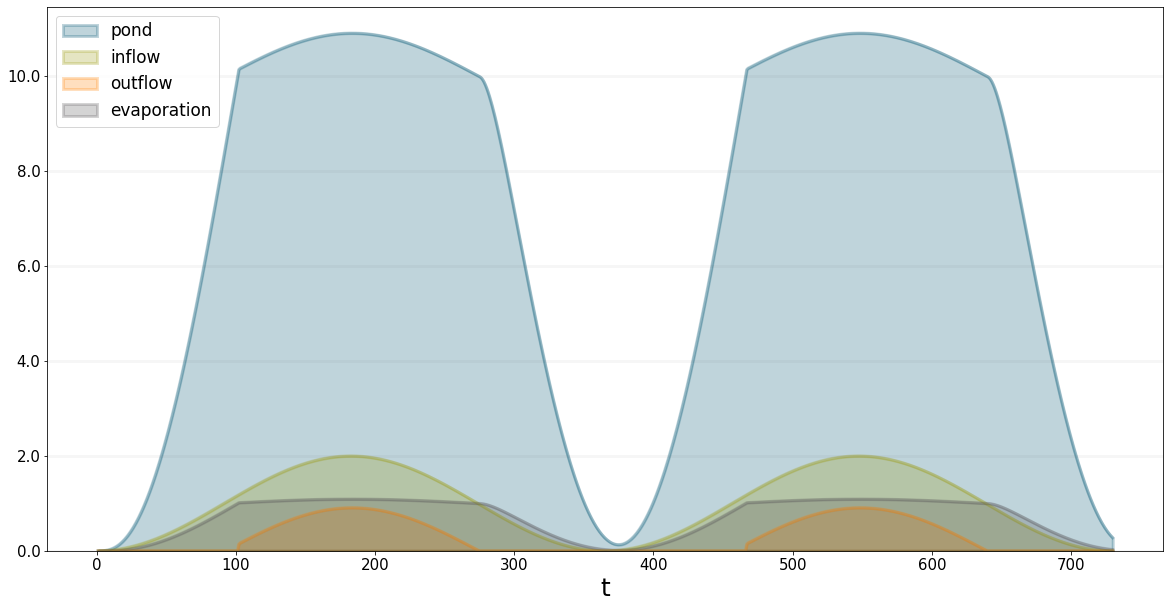

In [12]:
bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=['smWatershed'],
                    scenarios=['base'],
                    equations=['pond', 'inflow', 'outflow', 'evaporation'])

# Visualise the model

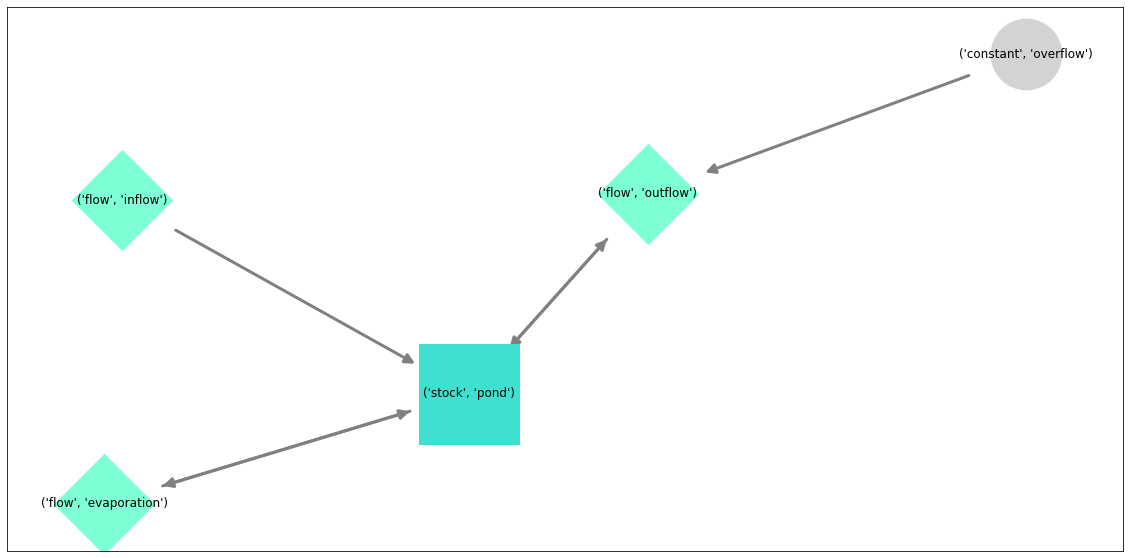

In [8]:
import sdmdlvis as mv
import matplotlib.pyplot as plt

mv.draw_model_graph(model, ax=plt.gca(), eqn=False)
plt.show()

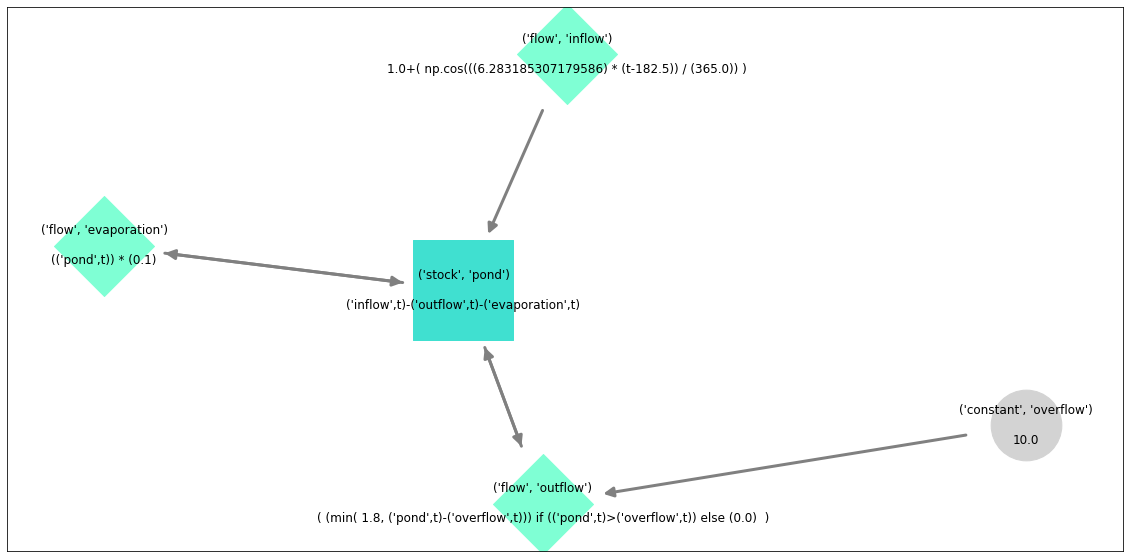

In [9]:
mv.draw_model_graph(model, ax=plt.gca(), eqn=True)
plt.show()